0.5796539


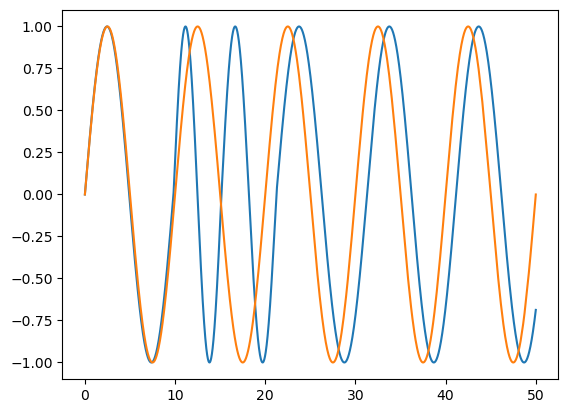

In [20]:
import jax
import jax.random as rand
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np




period = 10.
periods = loguniform_periods(jax.random.PRNGKey(42), 1000, 0.5) * period

t = jnp.linspace(0, 50, 1000000)
s0 = jnp.sin(2 * jnp.pi * t / period)
s = template(t, periods)
print(jnp.dot(s, s0) / jnp.sqrt(jnp.dot(s, s) * jnp.dot(s0, s0)))
plt.plot(t, s, '-')
plt.plot(t, s0, '-')
plt.show()

In [5]:
print(jnp.searchsorted(jnp.arange(1, 5), jnp.array([0.3, 1.5])))

[0 1]


0.97213143


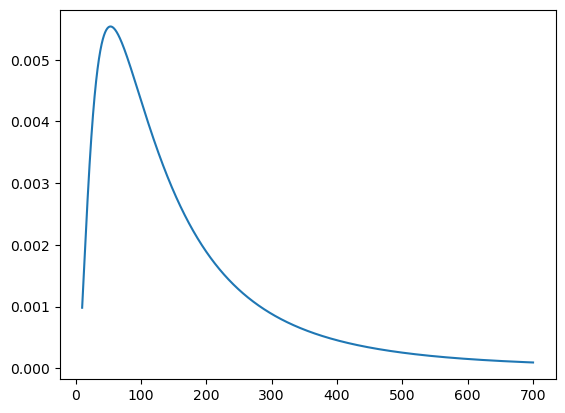

In [55]:

def nlogp_logNormal(z, log_mu, sigma):
    y = jnp.log(z)
    
    return 0.5 * jnp.square((y - log_mu)/sigma) + 0.5 * jnp.log(2 * jnp.pi * jnp.square(sigma)) + y

def nlogp(z):
    psigma = nlogp_logNormal(jnp.log(z[0]), jnp.log(0.1), 0.2)
    ptau = nlogp_logNormal(jnp.log(z[1]), jnp.log(120), 0.9)
    return psigma + ptau
    
num = 10000
z1 = jnp.linspace(10, 700, num)

pdf = jnp.exp(-logNormal(z1))
print(jnp.sum(pdf)* (z1[1] - z1[0]))
plt.plot(z1, pdf)
plt.show()

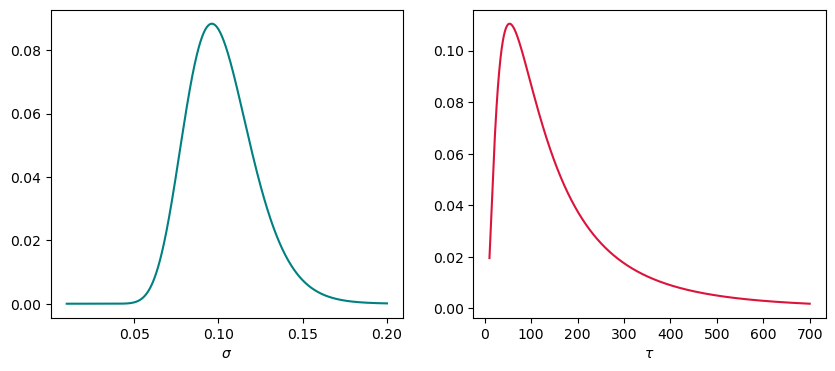

In [54]:
def logNormal(z):
    y = jnp.log(z)
    log_mu = jnp.log(jnp.array([0.1, 120.]))
    sigma = jnp.array([0.2, 0.9])
    
    return jnp.sum(0.5 * jnp.square((y - log_mu)/sigma) + 0.5 * jnp.log(2 * jnp.pi * jnp.square(sigma)) + y)

num = 1000
z1 = jnp.array([jnp.linspace(0.01, 0.2, num), jnp.ones(num) * 100.]).T
z2 = jnp.array([jnp.ones(num) * 0.1, jnp.linspace(10, 700, num)]).T

plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
pdf = jnp.exp(-jax.vmap(logNormal)(z1))
plt.plot(z1[:, 0], pdf, color = 'teal')
plt.xlabel(r'$\sigma$')

plt.subplot(1, 2, 2)
pdf = jnp.exp(-jax.vmap(logNormal)(z2))
plt.plot(z2[:, 1], pdf, color = 'crimson')
plt.xlabel(r'$\tau$')

plt.show()

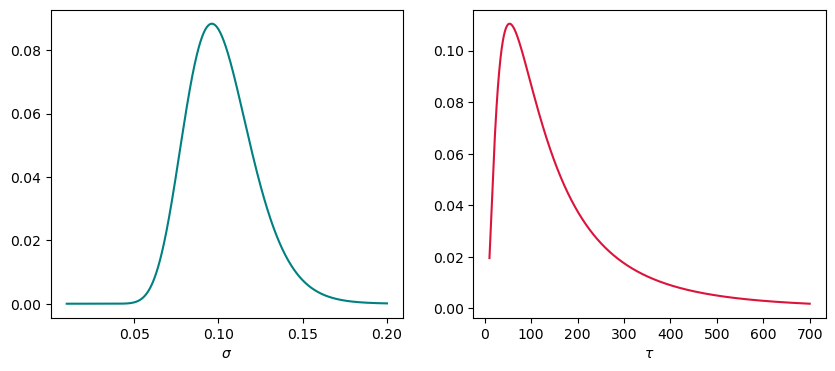

In [59]:
def nlogp_logNormal(z, log_mu, sigma):
    y = jnp.log(z)
    
    return 0.5 * jnp.square((y - log_mu)/sigma) + 0.5 * jnp.log(2 * jnp.pi * jnp.square(sigma)) + y

def nlogp(z):
    psigma = nlogp_logNormal(z[0], jnp.log(0.1), 0.2)
    ptau = nlogp_logNormal(z[1], jnp.log(120), 0.9)
    return psigma + ptau

num = 1000
z1 = jnp.array([jnp.linspace(0.01, 0.2, num), jnp.ones(num) * 100.]).T
z2 = jnp.array([jnp.ones(num) * 0.1, jnp.linspace(10, 700, num)]).T

plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
pdf = jnp.exp(-jax.vmap(nlogp)(z1))
plt.plot(z1[:, 0], pdf, color = 'teal')
plt.xlabel(r'$\sigma$')

plt.subplot(1, 2, 2)
pdf = jnp.exp(-jax.vmap(nlogp)(z2))
plt.plot(z2[:, 1], pdf, color = 'crimson')
plt.xlabel(r'$\tau$')

plt.show()